<h1>Capstone Project – Car Accident Severity Analysis</h1>

<h2>Applied Data Science Capstone Project</h2>

<h3>Introduction</h3>
In the modern society, travelling by motor vehicle is essential for a large part of the population to reach their destinations efficiently. Daily commute by car has become an important aspect of many people’s everyday life to get to work or school.  Due to various type of circumstances, car accidents can occur. Car accidents can inflict major harm to the vehicle and people involved. Specifically, it can cause economic loss, injuries and even fatalities. This study focuses on analyzing several main causes of car accidents and developing a suitable model to predict the severity of accident in a specified condition. The target audience would be motor vehicle drivers. The goal of this study is to produce a model that improves driver’s awareness of a dangerous condition and reduce the likelihood of a car accident.

<h3>Acquiring the Data</h3>
Data is extracted from the "Data-Collision" excel document. 

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_325695a5dddf4bb396e7440ea7658506 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3sbGBYNN1vKvyuK2JO9toEUVxDP9uxWY4SmlLmxDQwX6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_325695a5dddf4bb396e7440ea7658506.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-8f72thcuhbaohh',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>Preprocessing</h3>
<p>The original dataset needs to be refined and pre-processed due to the following reasons:
<br>1.	Unbalanced data: There are 136485 records for severity code 1 and 58188 records for severity code 2.
<br>2.	Null entries: 17 independent variables in the dataset contains null entries
<br>3.	Duplicated attribute: “SEVERITYCODE” appeared twice in the dataset
<br>4.	Text records: some text records need to be converted to numerical type for analysis
<br>5.	Key Variable Extraction: Several less relevant attributes need to be dropped out before analysis
</p>

Severity code is the dependent variable in this study. It has a duplicated set in the original dataset which need to be removed.

In [2]:
df=df.drop(columns = ['SEVERITYCODE.1'])

Since the dataset contain numerous attributes that are comparatively less relevant to the study, they are removed before performing further processing and analysis

In [3]:
df_extract=df.drop(columns=['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
                                    'SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','INCDTTM','JUNCTIONTYPE',
                                    'SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE',
                                     'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'])

In [4]:
df_extract["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [5]:
df_extract.isnull().sum()

SEVERITYCODE       0
ADDRTYPE        1926
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

Null values only represent a small portion of the extracted dataset, therefore they can be taken out

In [6]:
df_refined=df_extract.dropna()

In [7]:
df_refined["SEVERITYCODE"].value_counts()

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

Since the number of records for severity code 1 is much higher than severity code 2, they need to be balanced to produce more accurate result

In [8]:
df_balanced=df_refined.drop(df_refined.query('SEVERITYCODE == 1').sample(frac=1-56883/130642).index)

In [9]:
df_balanced["SEVERITYCODE"].value_counts()

2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

In [10]:
df_balanced.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight
7,2,Intersection,Clear,Dry,Daylight
8,1,Block,Clear,Dry,Daylight


Check and convert data to proper type prior to analysis

In [11]:
df_balanced.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [12]:
df_balanced["ADDRTYPE"]=df_balanced["ADDRTYPE"].astype('category')
df_balanced["WEATHER"]=df_balanced["WEATHER"].astype('category')
df_balanced["ROADCOND"]=df_balanced["ROADCOND"].astype('category')
df_balanced["LIGHTCOND"]=df_balanced["LIGHTCOND"].astype('category')

In [13]:
df_balanced.dtypes

SEVERITYCODE       int64
ADDRTYPE        category
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [14]:
df_balanced["ADDRTYPE"].value_counts()

Block           70203
Intersection    43205
Alley             358
Name: ADDRTYPE, dtype: int64

In [15]:
df_balanced["WEATHER"].value_counts()

Clear                       68183
Raining                     20681
Overcast                    16973
Unknown                      6582
Snowing                       488
Other                         404
Fog/Smog/Smoke                347
Sleet/Hail/Freezing Rain       63
Blowing Sand/Dirt              29
Severe Crosswind               13
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [16]:
df_balanced["ROADCOND"].value_counts()

Dry               76305
Wet               29514
Unknown            6508
Ice                 686
Snow/Slush          532
Other                79
Standing Water       61
Oil                  43
Sand/Mud/Dirt        38
Name: ROADCOND, dtype: int64

In [17]:
df_balanced["LIGHTCOND"].value_counts()

Daylight                    71845
Dark - Street Lights On     29252
Unknown                      5837
Dusk                         3584
Dawn                         1555
Dark - No Street Lights       854
Dark - Street Lights Off      707
Other                         125
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_balanced['ADDRTYPE_NUM'] = LE.fit_transform(df_balanced['ADDRTYPE'])
df_balanced['WEATHER_NUM'] = LE.fit_transform(df_balanced['WEATHER'])
df_balanced['ROADCOND_NUM'] = LE.fit_transform(df_balanced['ROADCOND'])
df_balanced['LIGHTCOND_NUM'] = LE.fit_transform(df_balanced['LIGHTCOND'])

In [19]:
df_balanced.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_NUM,WEATHER_NUM,ROADCOND_NUM,LIGHTCOND_NUM
0,2,Intersection,Overcast,Wet,Daylight,2,4,8,5
3,1,Block,Clear,Dry,Daylight,1,1,0,5
4,2,Intersection,Raining,Wet,Daylight,2,6,8,5
7,2,Intersection,Clear,Dry,Daylight,2,1,0,5
8,1,Block,Clear,Dry,Daylight,1,1,0,5


<h3>Data Exploration</h3>

In [20]:
df_category = df_balanced[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

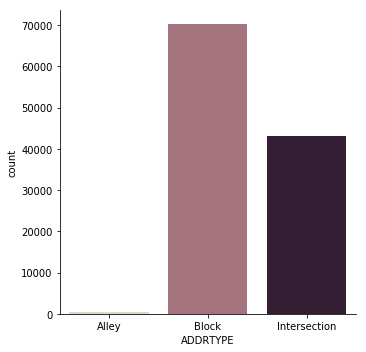

In [22]:
sns.catplot(x="ADDRTYPE", kind="count", palette="ch:.23", data=df_category)

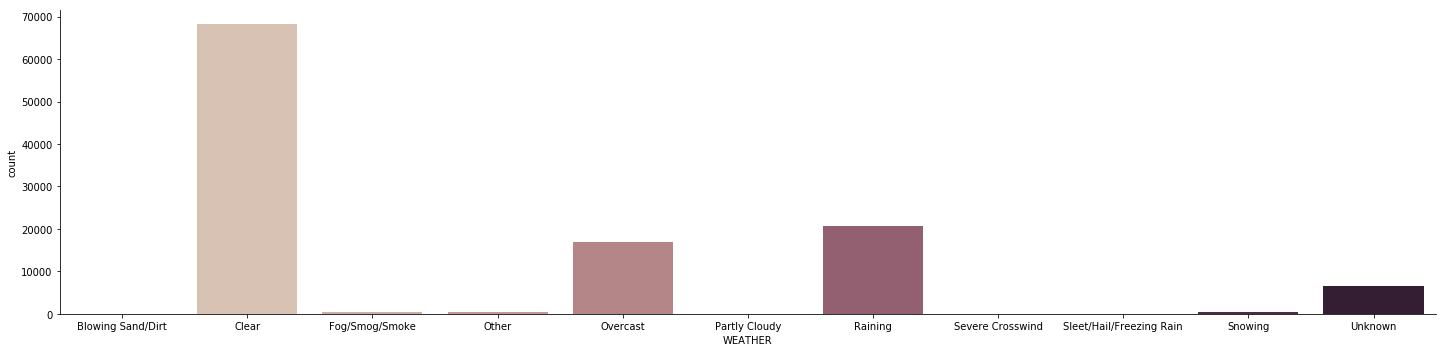

In [23]:
sns.catplot(x="WEATHER", kind="count", palette="ch:.23", aspect=4,data=df_category)

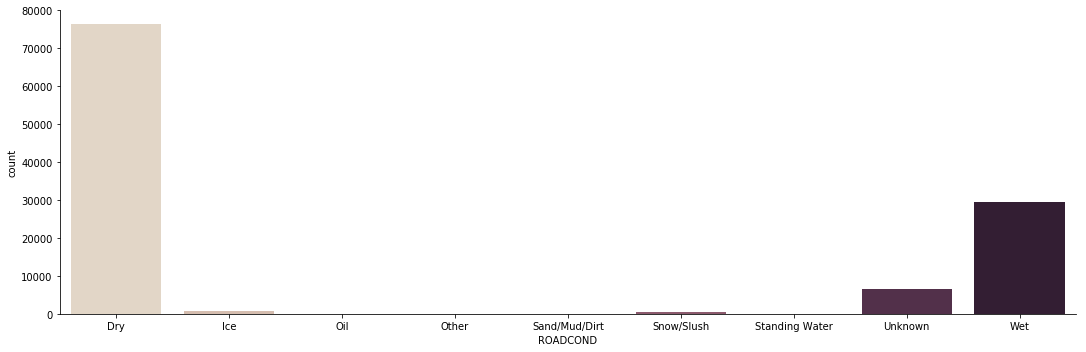

In [24]:
sns.catplot(x="ROADCOND", kind="count", palette="ch:.23", aspect=3,data=df_category)

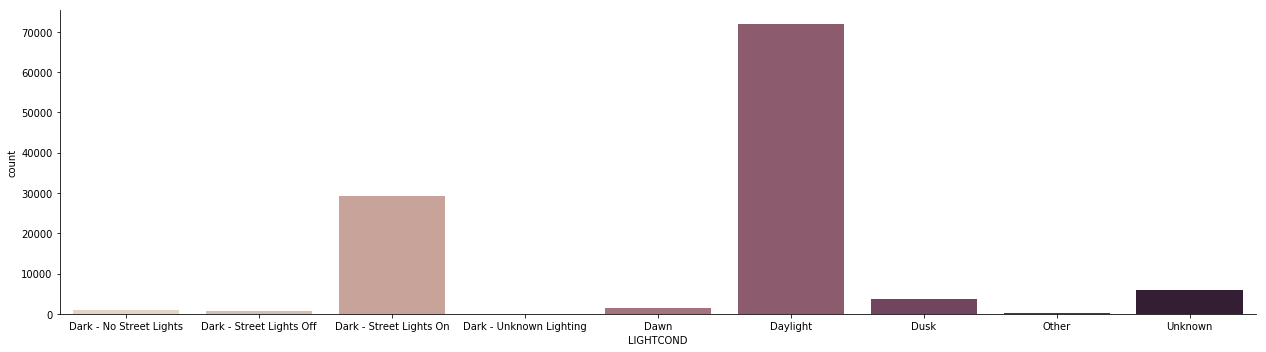

In [25]:
sns.catplot(x="LIGHTCOND", kind="count", palette="ch:.23", aspect=3.5,data=df_category)

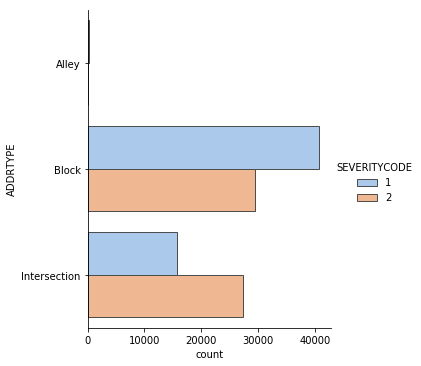

In [26]:
sns.catplot(y="ADDRTYPE", hue="SEVERITYCODE", kind="count",
            palette="pastel", edgecolor=".3",
            data=df_category)

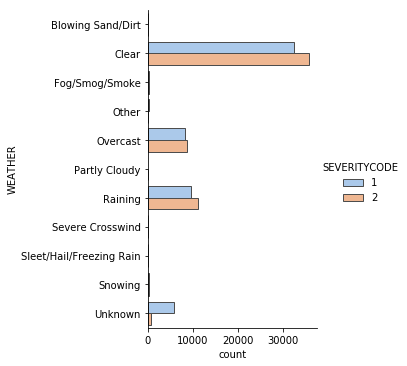

In [27]:
sns.catplot(y="WEATHER", hue="SEVERITYCODE", kind="count",
            palette="pastel", edgecolor=".3",
            data=df_category)

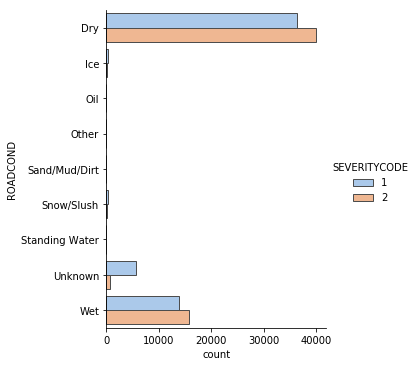

In [28]:
sns.catplot(y="ROADCOND", hue="SEVERITYCODE", kind="count",
            palette="pastel", edgecolor=".3",
            data=df_category)

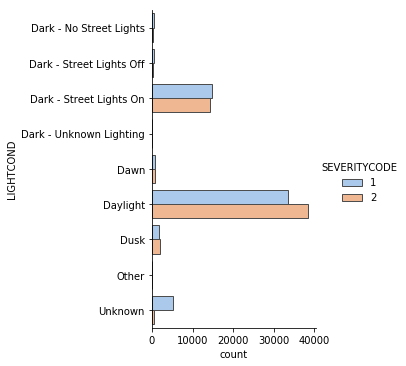

In [29]:
sns.catplot(y="LIGHTCOND", hue="SEVERITYCODE", kind="count",
            palette="pastel", edgecolor=".3",
            data=df_category)

Based on initial observations through these diagrams, it is apparent that certain conditions in the selected attributes: collision address type (ADDRTYPE), weather conditions(WEATHER), road conditions(ROADCOND) and light conditions(LIGHTCOND) lead to more accidents than the others, and the severity varies under different conditions.

<h3>Methodology</h3>

<p>Since the goal of this study is to determine the outcome (severity) of car accident under different conditions, the following machine learning algorithm will be used to build the model for this study:
<br>1.	K Nearest Neighbor(KNN): A supervised learning algorithm used to predict outcomes based on 'K' nearest points
<br>2.	Decision Tree: Predict event outcomes using a tree-like structure. 
<br>3.	Support Vector Machine: Categorizes data by mapping points to high-dimensional feature space so that they can be separated by hyperplanes.
<br>4.	Logistic Regression:A variation of linear regression that predicts the probability of a class label with respect to the independent variables. In this case, the class label would be severity and independent variables would be the extracted attributes.
</p>

In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h4>Feature Selection</h4>

Define X and y

In [31]:
X = df_balanced[['ADDRTYPE_NUM','WEATHER_NUM','ROADCOND_NUM','LIGHTCOND_NUM']]
X[0:5]

,ADDRTYPE_NUM,WEATHER_NUM,ROADCOND_NUM,LIGHTCOND_NUM
0,2,4,8,5
3,1,1,0,5
4,2,6,8,5
7,2,1,0,5
8,1,1,0,5


In [32]:
y = df_balanced['SEVERITYCODE'].values
y[0:5]

array([2, 1, 2, 2, 1])

<h4>Data Normalization</h4>

Data is normalized to achieve 0 mean and unit variance

In [33]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.26962877,  0.40057028,  1.50758603,  0.40332325],
       [-0.76706925, -0.7184298 , -0.69032459,  0.40332325],
       [ 1.26962877,  1.14657033,  1.50758603,  0.40332325],
       [ 1.26962877, -0.7184298 , -0.69032459,  0.40332325],
       [-0.76706925, -0.7184298 , -0.69032459,  0.40332325]])

<h4>Train-Test Split</h4>

A 70:30 split is applied to the test and train and data sets

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=3)
print("Train set dimensions:", Xtrain.shape, ytrain.shape)
print("Test set dimensions:", Xtest.shape, ytest.shape)

Train set dimensions: (79636, 4) (79636,)
Test set dimensions: (34130, 4) (34130,)


<h3>Classification</h3>

<h4>K Nearest Neighbor(KNN)</h4>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Kmax = 15
MeanAccuracy = np.zeros((Kmax-1))
StdAccuracy = np.zeros((Kmax-1))
ConfusionMat = [];

for n in range(1,Kmax):
    Kneigh = KNeighborsClassifier(n_neighbors = n).fit(Xtrain, ytrain)
    yhat=Kneigh.predict(Xtest)
    MeanAccuracy[n-1] = metrics.accuracy_score(ytest, yhat)
    StdAccuracy[n-1] = np.std(yhat==ytest)/np.sqrt(yhat.shape[0])

MeanAccuracy

array([0.54655728, 0.55259303, 0.54298271, 0.55962496, 0.56176384,
       0.55347202, 0.55027835, 0.54233812, 0.5556695 , 0.5552593 ,
       0.56384413, 0.51640785, 0.56199824, 0.50799883])

<function matplotlib.pyplot.show(*args, **kw)>

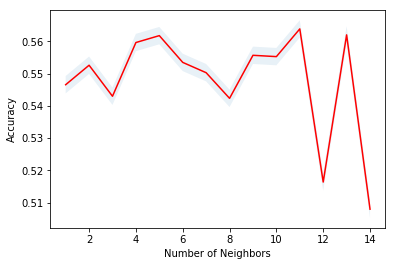

In [36]:
plt.plot(range(1,Kmax),MeanAccuracy,'r')
plt.fill_between(range(1,Kmax),MeanAccuracy - 1 * StdAccuracy,MeanAccuracy + 1 * StdAccuracy, alpha=0.1)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show

In [37]:
print("Based on the plot above, the best accuracy was with", MeanAccuracy.max(), "when k =",MeanAccuracy.argmax()+1)

Based on the plot above, the best accuracy was with 0.5638441254028713 when k = 11


Since the optimal k is determined to be 11, the model is re-constructed with the optimal k using training data

In [38]:
Kneigh2 = KNeighborsClassifier(n_neighbors=11).fit(Xtrain,ytrain)

<h4>Decision Tree</h4>

In [39]:
from sklearn.tree import DecisionTreeClassifier
DeciTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
DeciTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
DeciTree.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
PredTree = DeciTree.predict(Xtest)
print("Decision Trees's Accuracy is: ", metrics.accuracy_score(ytest, PredTree))

Decision Trees's Accuracy is:  0.601494286551421


<h4>Support Vector Machine</h4>

In [42]:
from sklearn import svm
SVMmodel = svm.SVC(kernel='rbf')
SVMmodel.fit(Xtrain, ytrain)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
yhat2 = SVMmodel.predict(Xtest)

<h4>Logistic Regression</h4>

In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xtrain,ytrain)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
yhat3 = LR.predict(Xtest)

<h3>Model Evaluation</h3>

<h4>K Nearest Neighbor(KNN)</h4>

In [46]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [47]:
yhat_test1 = Kneigh2.predict(Xtest)
print("Average F1-score: %.5f" % f1_score(ytest, yhat_test1, average = 'weighted'))
print("Jaccard score: %.5f" % jaccard_similarity_score(ytest, yhat_test1))

Average F1-score: 0.51207
Jaccard score: 0.51641


<h4>Decision Tree</h4>

In [48]:
yhat_test2 = DeciTree.predict(Xtest)
print("Average F1-score: %.5f" % f1_score(ytest, yhat_test2, average = 'weighted'))
print("Jaccard score: %.5f" % jaccard_similarity_score(ytest, yhat_test2))

Average F1-score: 0.59513
Jaccard score: 0.60149


<h4>Support Vector Machine</h4>

In [49]:
yhat_test3 = SVMmodel.predict(Xtest)
print("Average F1-score: %.5f" % f1_score(ytest, yhat_test3, average = 'weighted'))
print("Jaccard score: %.5f" % jaccard_similarity_score(ytest, yhat_test3))

Average F1-score: 0.59531
Jaccard score: 0.60152


<h4>Logistic Regression</h4>

In [50]:
yhat_test4 = LR.predict(Xtest)
print("Average F1-score: %.5f" % f1_score(ytest, yhat_test4, average = 'weighted'))
print("Jaccard score: %.5f" % jaccard_similarity_score(ytest, yhat_test4))
yhat_test4_prob = LR.predict_proba(Xtest)
print("Log Loss: %.5f" % log_loss(ytest, yhat_test4_prob))

Average F1-score: 0.59337
Jaccard score: 0.59815
Log Loss: 0.66458


<h3>Results</h3>

| Algorithm          | Jaccard | F1-score | LogLoss | Average (Jaccard & F1-score) |
|--------------------|---------|----------|---------|---------|
| KNN                | 0.51641       | 0.51207        | NA      | 0.51424        |        
| Decision Tree      | 0.60149       | 0.59513        | NA      | 0.59831        |    
| SVM                | 0.60152       | 0.59531        | NA      | 0.59842        |        
| LogisticRegression | 0.59815       | 0.59337        | 0.66458       |0.59576        |

The accuracy of each model is evaluated using the following metrics: Jaccard similarity coefficient score, F1-score and log loss. Jaccard similarity coefficient score calculates the size of intersection between the predicted data set and actual test data set over their total size. F1-score determines test accuracy based on precision and recall. Log loss is a loss function that penalizes inaccurate prediction, which should be relatively low when the model is highly accurate. Among the applied algorithms, log loss is only suitable for evaluating logistic regression. Hence to compare these models, Jaccard similarity coefficient score and F1-score are used instead. The average of Jaccard score and F1-score for Support Vector Machine model is slightly higher than the other models used in this study.

<h3>Discussion</h3>

Based on the results from each evaluation metrics, Support Vector Machine model is slightly more accurate than the other three models. Therefore, when evaluating severity of car accidents through collision address type, weather conditions, road conditions and light conditions, Support Vector Machine model should be used. However, since the average of Jaccard and F1-score is close to 0.6, the model is only moderately accurate. Note that other models have similar accuracy results. Thus, for any future studies, it is recommended to explore other factors that may contribute to car accidents within or outside of the original dataset. It is also recommended to test different maximum depth for decision tree and C values for Support Vector Machine and Logistic Regression to increase the accuracy of existing models.

<h3>Conclusion</h3>

According to the results of this study, collision address type, weather conditions, road conditions and light conditions has moderate effect on the severity of car accident. While existing models can be optimized by tuning max depth for decision tree and C values for Support Vector Machine and Logistic Regression, other car accident related attributes can also be explored to obtain model with higher accuracy.